# NGC 1275 Limit Plots 
This notebook allows the reproduction of Figs. 7 and 8 from J. H. Matthews et al. 2022, "How do magnetic field models affect astrophysical limits on light axion-like particles? An X-ray case study with NGC 1275".

In [9]:
%matplotlib inline
import numpy as np
from astropy.io import ascii 
import matplotlib.pyplot as plt 
import alpro
data = ascii.read('NGC1275_limits.dat')  

## Fig 7: Spectral Model Comparison

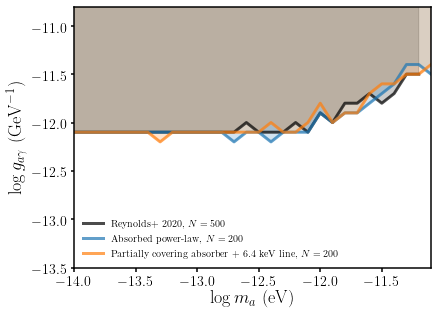

In [32]:
alpro.util.set_default_plot_params(tex=True)
labels = [r"Reynolds+ 2020, $N=500$", "Absorbed power-law, $N=200$", "Partially covering absorber $+$ $6.4$~keV line, $N=200$"]
mods = ["r20", "abspl", "1"]
colors = ["k", "C0", "C1"]
plt.figure()
for i, label in enumerate(labels):
    plt.plot(data["logm"], data["logg_{}".format(mods[i])], c=colors[i], lw=3, ls="-", label=label, alpha=0.7)
    plt.fill_between(data["logm"], data["logg_{}".format(mods[i])], y2=-10.8, alpha=0.2, color=colors[i])

plt.legend(frameon=False, loc=3)
plt.xlim(-14,-11.1)
plt.ylim(-13.5,-10.8)
plt.ylabel(r"$\log g_{a\gamma}~({\rm GeV}^{-1})$", fontsize=18)
_ = plt.xlabel(r"$\log m_a~({\rm eV})$", fontsize=18)

## Fig 8: B-field Model Comparison

Text(0.5, 0, '$\\log m_a~({\\rm eV})$')

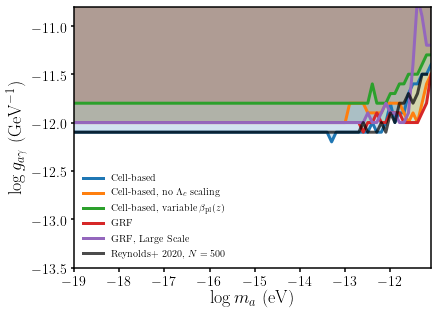

In [33]:
alpro.util.set_default_plot_params(tex=True)
labels = [
    "Cell-based", 
    r"Cell-based, no $\Lambda_c$ scaling", 
    r"Cell-based, variable $\beta_{\rm pl}(z)$", 
    "GRF", 
    "GRF, Large Scale"
]
colors = ["C0", "C1", "C3", "C2", "C4"]
for i, label in enumerate(labels):
    plt.plot(data["logm"], data["logg_{}".format(i+1)], label=label)
    plt.fill_between(data["logm"], data["logg_{}".format(i+1)], y2=-10.8, alpha=0.2, color=colors[i])

plt.plot(data["logm"], data["logg_r20".format(i+1)], c="k", lw=3, ls="-", label=r"Reynolds+ 2020, $N=500$", alpha=0.7)
plt.legend(frameon=False, loc=3)
plt.xlim(-19,-11.1)
plt.ylim(-13.5,-10.8)
plt.ylabel(r"$\log g_{a\gamma}~({\rm GeV}^{-1})$", fontsize=18)
plt.xlabel(r"$\log m_a~({\rm eV})$", fontsize=18)